# Exercises

Experiment with different models and see how the accuracy results differ. In particular change the following parameters:
*   Set training epochs set to 1
*   Number of neurons in the Dense layer following the Flatten one. For example, go really low (e.g. 10) in ranges up to 512 and see how accuracy changes
*   Add additional Dense layers between the Flatten and the final Dense(10), experiment with different units in these layers
*   Don't normalize the pixel values, and see the effect that has


Remember to enable GPU to make everything run faster (Runtime -> Change runtime type -> Hardware accelerator -> GPU).
Also, if you run into trouble, simply reset the entire environment and start from the beginning:
*   Edit -> Clear all outputs
*   Runtime -> Reset all runtimes

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

def train_model(X_train, y_train, X_test, y_test,
                normalize=True, epochs=5,
                dense_units=128, extra_layers=[]):
    if normalize:
        X_train = X_train / 255.0
        X_test = X_test / 255.0
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(dense_units, activation='relu'),
        *extra_layers,
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=epochs,
                        validation_data=(X_test, y_test),
                        verbose=0)

    return history, model

In [2]:
history_1epoch, _ = train_model(X_train, y_train, X_test, y_test, epochs=1)
print(f"1 Epoch - Test Accuracy: {history_1epoch.history['val_accuracy'][0]:.4f}")
history_5epoch, _ = train_model(X_train, y_train, X_test, y_test, epochs=5)
print(f"5 Epochs - Final Test Accuracy: {history_5epoch.history['val_accuracy'][-1]:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1 Epoch - Test Accuracy: 0.9624
5 Epochs - Final Test Accuracy: 0.9746


Units: 10 - Test Accuracy: 0.9305
Units: 32 - Test Accuracy: 0.9655
Units: 64 - Test Accuracy: 0.9679
Units: 128 - Test Accuracy: 0.9767
Units: 256 - Test Accuracy: 0.9787
Units: 512 - Test Accuracy: 0.9817


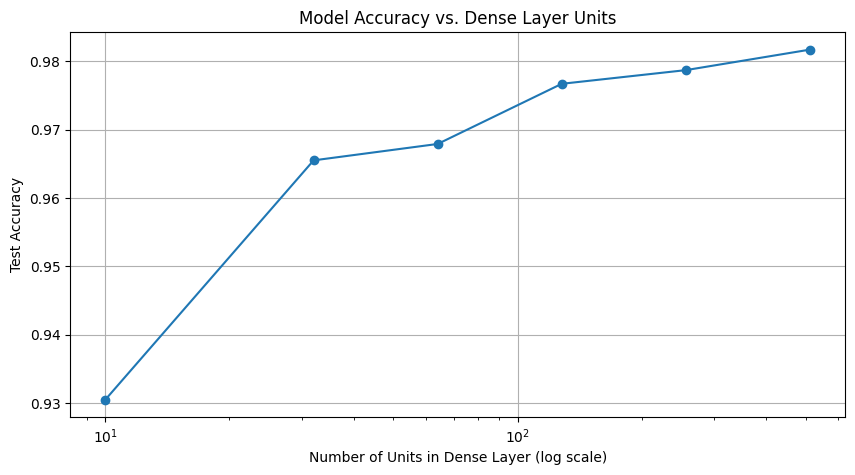

Units: 10 - Test Accuracy: 0.9258
Units: 32 - Test Accuracy: 0.9626
Units: 64 - Test Accuracy: 0.9718
Units: 128 - Test Accuracy: 0.9765
Units: 256 - Test Accuracy: 0.9800
Units: 512 - Test Accuracy: 0.9760


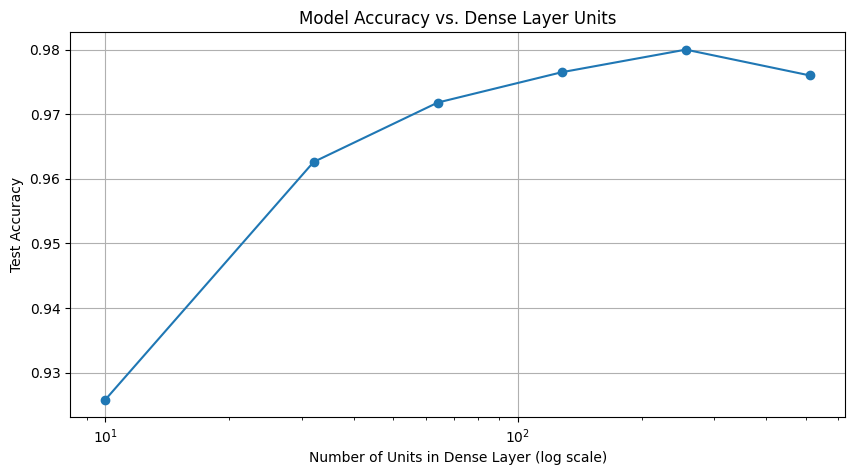

In [7]:
unit_sizes = [10, 32, 64, 128, 256, 512]
results = {}
for units in unit_sizes:
    history, _ = train_model(X_train, y_train, X_test, y_test, dense_units=units)
    results[units] = history.history['val_accuracy'][-1]
    print(f"Units: {units} - Test Accuracy: {results[units]:.4f}")
plt.figure(figsize=(10, 5))
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.xscale('log')
plt.xlabel('Number of Units in Dense Layer (log scale)')
plt.ylabel('Test Accuracy')
plt.title('Model Accuracy vs. Dense Layer Units')
plt.grid(True)
plt.show()

In [8]:
history_baseline, _ = train_model(X_train, y_train, X_test, y_test)
print(f"Baseline (1 hidden layer) - Test Accuracy: {history_baseline.history['val_accuracy'][-1]:.4f}")
history_2layers, _ = train_model(X_train, y_train, X_test, y_test,
                                extra_layers=[keras.layers.Dense(64, activation='relu')])
print(f"2 Hidden Layers - Test Accuracy: {history_2layers.history['val_accuracy'][-1]:.4f}")
history_3layers, _ = train_model(X_train, y_train, X_test, y_test,
                                extra_layers=[keras.layers.Dense(128, activation='relu'),
                                             keras.layers.Dense(64, activation='relu')])
print(f"3 Hidden Layers - Test Accuracy: {history_3layers.history['val_accuracy'][-1]:.4f}")
history_deep, _ = train_model(X_train, y_train, X_test, y_test,
                             extra_layers=[keras.layers.Dense(256, activation='relu'),
                                          keras.layers.Dense(128, activation='relu'),
                                          keras.layers.Dense(64, activation='relu')])
print(f"4 Hidden Layers - Test Accuracy: {history_deep.history['val_accuracy'][-1]:.4f}")

Baseline (1 hidden layer) - Test Accuracy: 0.9772
2 Hidden Layers - Test Accuracy: 0.9762
3 Hidden Layers - Test Accuracy: 0.9752
4 Hidden Layers - Test Accuracy: 0.9748
Baseline (1 hidden layer) - Test Accuracy: 0.9740
2 Hidden Layers - Test Accuracy: 0.9741
3 Hidden Layers - Test Accuracy: 0.9789
4 Hidden Layers - Test Accuracy: 0.9757


In [5]:
history_no_norm, _ = train_model(X_train, y_train, X_test, y_test, normalize=False)
print(f"No Normalization - Test Accuracy: {history_no_norm.history['val_accuracy'][-1]:.4f}")
history_norm, _ = train_model(X_train, y_train, X_test, y_test, normalize=True)
print(f"With Normalization - Test Accuracy: {history_norm.history['val_accuracy'][-1]:.4f}")

No Normalization - Test Accuracy: 0.9417
With Normalization - Test Accuracy: 0.9768
No Normalization - Test Accuracy: 0.9329
